In [43]:
import numpy as np
import random
from collections import Counter
import scipy.stats as ss
import matplotlib.pyplot as plt

In [38]:
def distance(p1, p2):
    """
    Calculates Euclidean distance between points p1 (x1,y1) and p2 (x2,y2)
    """
    return np.sqrt(np.sum(np.square(p1-p2)))

In [39]:
def majority_vote(votes):
    """
    Returns the most common element in votes
    """
    vote_counts = Counter(votes)
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    return random.choice(winners)

def majority_vote_short(votes):
    """
    Returns the most common elements in votes
    """
    mode, count == ss.mstats.mode(votes)
    return mode

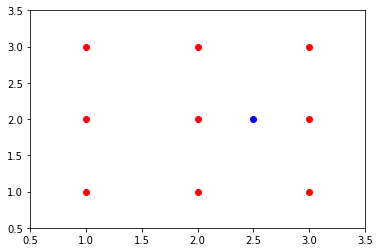

In [66]:
points = np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
outcomes = np.array([0,0,0,0,1,1,1,1,1])
p = np.array([2.5, 2])
plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0],p[1], "bo")
plt.axis([0.5, 3.5, 0.5, 3.5])
plt.show()

In [56]:
def find_nearest_neighbours(p, points, k=5):
    """
    Find the k nearest neighvours of point p and return their indices
    """
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]
        

In [61]:
# The k nearest points to p
ind = find_nearest_neighbours(p, points)
print(points[ind])

[[2 2]
 [3 2]
 [2 1]
 [2 3]
 [3 1]]


In [69]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbours(p, points, k)
    return majority_vote(outcomes[ind])

In [72]:
knn_predict(np.array([1.0,2.7]), points, outcomes, k=2)

0

In [74]:
ss.norm(0,1).rvs((5,2))

array([[-0.2679258 , -0.20487967],
       [ 1.97424189,  0.28103909],
       [-0.56462092,  1.26980606],
       [ 0.20847523, -0.17304798],
       [-1.06580609, -0.01654618]])

In [75]:
ss.norm(1,1).rvs((5,2))

array([[ 0.24968012,  1.17673857],
       [ 1.41809366,  1.02766638],
       [ 1.12012359,  2.04696111],
       [ 1.35889963, -0.07199945],
       [ 1.6613224 ,  0.4071433 ]])

In [80]:
def generate_synthetic_data(n=50):
    """
    Creat two sets of points from bivariate normal distribution
    """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
    return (points, outcomes)


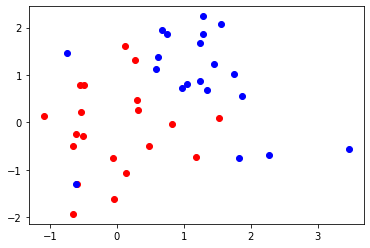

In [82]:
n = 20
points, outcome = generate_synthetic_data(n)
plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
plt.savefig('bivariate_data.pdf')

In [84]:
def make_prediction_grid(predictors, outcome, limits, h, k):
    """
    Classify each point on the prediction grid
    """
    x_min, x_max, y_min, y_max = limits
    
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcome, k)
    
    return xx, yy, prediction_grid

In [85]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [109]:
predictors, outcomes = generate_synthetic_data()
print(predictors.shape)
print(outcomes.shape)

(100, 2)
(100,)


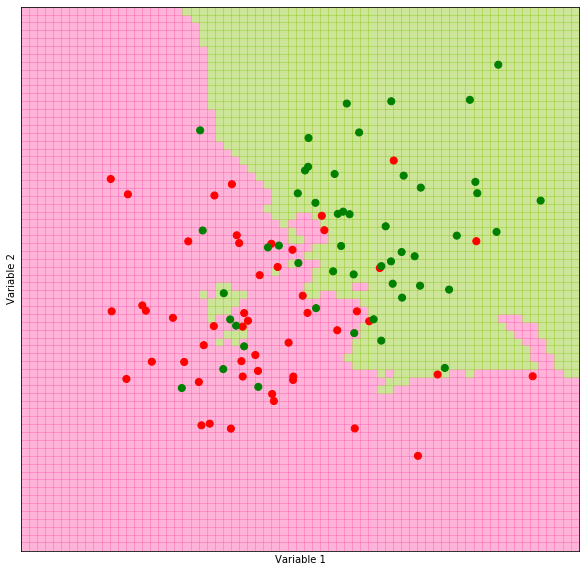

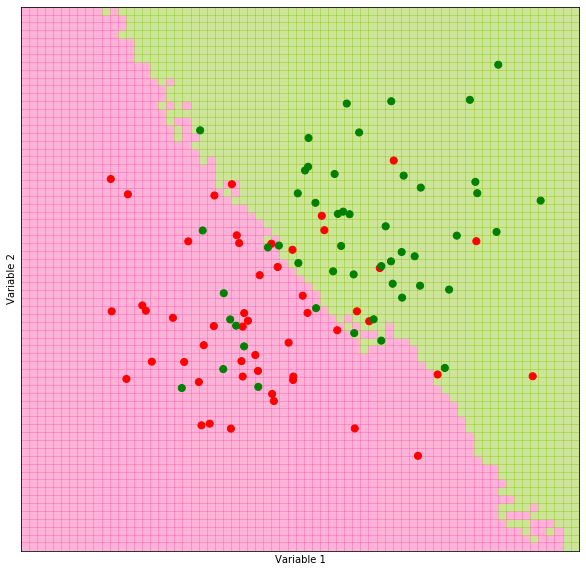

In [112]:
k = 5
filename = "knn_synth_5.pdf"
limits = (-3,4,-3,4)
h = 0.1
xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

k = 50
filename = "knn_synth_50.pdf"
limits = (-3,4,-3,4)
h = 0.1
xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

In [99]:
from sklearn import datasets

In [102]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

(150,)


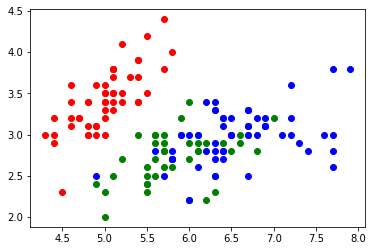

In [113]:
predictors = iris.data[:,0:2]
outcomes = iris.target
print(outcomes.shape)
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")
plt.savefig("iris.pdf")

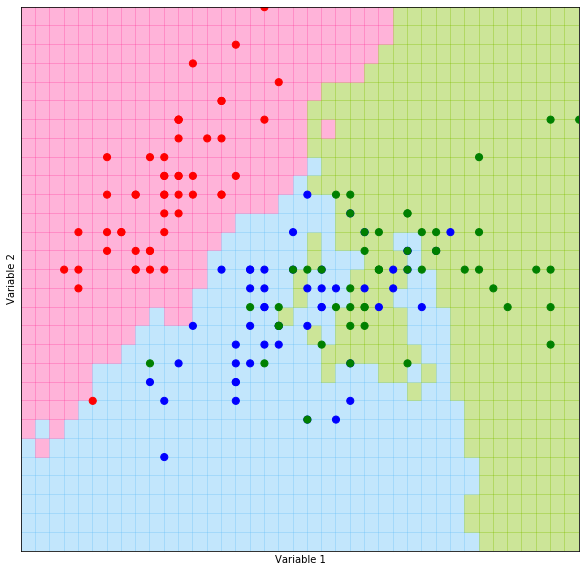

In [114]:
k = 5
filename = "iris_grid.pdf"
limits = (4,8,1.5,4.5)
h = 0.1
xx, yy, prediction_grid = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid (xx, yy, prediction_grid, filename)

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)
sk_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1])

In [121]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])
my_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [125]:
np.mean(sk_predictions == my_predictions) * 100

0.96

In [127]:
np.mean(sk_predictions == outcomes) * 100

83.33333333333334

In [128]:
np.mean(my_predictions == outcomes) * 100

84.66666666666667